## PROYECTO DE REGRESION LINEAL

### Importacion de librerias

In [3]:
# Importacion de librerias necesarias
import numpy as np
import pandas as pd
import sklearn.model_selection as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt

### Importacion de datos

In [4]:
dataSet = pd.DataFrame(np.load('proyecto_training_data.npy'), columns=['SalePrice', 'Overa1Qual', '1stF1rSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dataSet.describe()

,SalePrice,Overa1Qual,1stF1rSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [5]:
# Creacion de funcion de limpieza de datos
def LimpiarDatos(dato):
    res = (mt.isnan (float("nan")))
    if(res): return dato 
    else: return 0

### Seleccion de datos

In [6]:
extInicial = int(len(dataSet) * 0.8) #se extrae el 80% de datos de entrenamiento
extRestante = int(len(dataSet) * 0.2) #se extrae el 20% de datos de validacion

dfEntr = dataSet.iloc[0:extInicial]
dfVal = dataSet.iloc[extInicial:]
dfEntr.head()
dfEntr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1168 non-null   float64
 1   Overa1Qual    1168 non-null   float64
 2   1stF1rSF      1168 non-null   float64
 3   TotRmsAbvGrd  1168 non-null   float64
 4   YearBuilt     1168 non-null   float64
 5   LotFrontage   962 non-null    float64
dtypes: float64(6)
memory usage: 54.9 KB


### Analisis de datos obteniendo los calculos de valores minimos, maximos, varianza, media, mediana y rango

In [7]:
arr = []
for subtup in dfEntr:
    arr.append({ 
        'media':np.mean(dfEntr[subtup]),
        'maximo':np.amax(dfEntr[subtup]),
        'minimo':np.amin(dfEntr[subtup]),
        'rango':np.ptp(dfEntr[subtup]),
        'desviacion ':np.std(dfEntr[subtup])
    })    
arr

[{'media': 180590.27739726027,
  'maximo': 755000.0,
  'minimo': 34900.0,
  'rango': 720100.0,
  'desviacion ': 78781.95108033359},
 {'media': 6.101027397260274,
  'maximo': 10.0,
  'minimo': 1.0,
  'rango': 9.0,
  'desviacion ': 1.3774351932407467},
 {'media': 1156.3236301369864,
  'maximo': 3228.0,
  'minimo': 334.0,
  'rango': 2894.0,
  'desviacion ': 373.6203315035858},
 {'media': 6.4854452054794525,
  'maximo': 14.0,
  'minimo': 2.0,
  'rango': 12.0,
  'desviacion ': 1.6084517167387353},
 {'media': 1971.451198630137,
  'maximo': 2010.0,
  'minimo': 1875.0,
  'rango': 135.0,
  'desviacion ': 29.9388820686777},
 {'media': 69.94698544698545,
  'maximo': 313.0,
  'minimo': 21.0,
  'rango': nan,
  'desviacion ': 23.465954819930392}]

### Analisis de graficas de cada variable

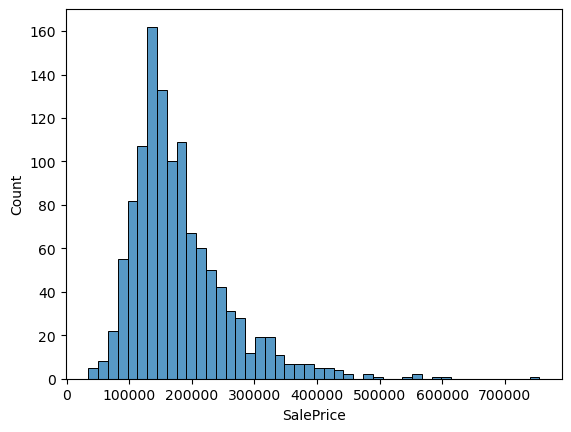

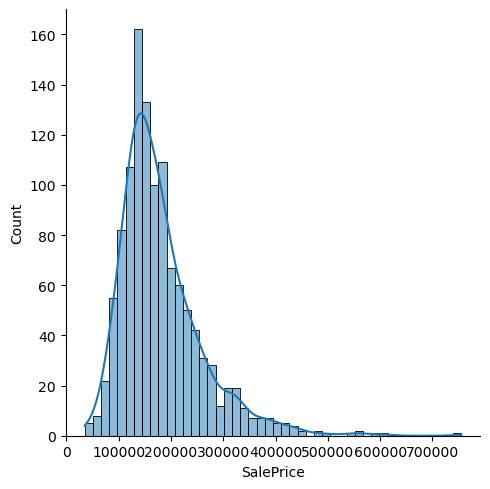

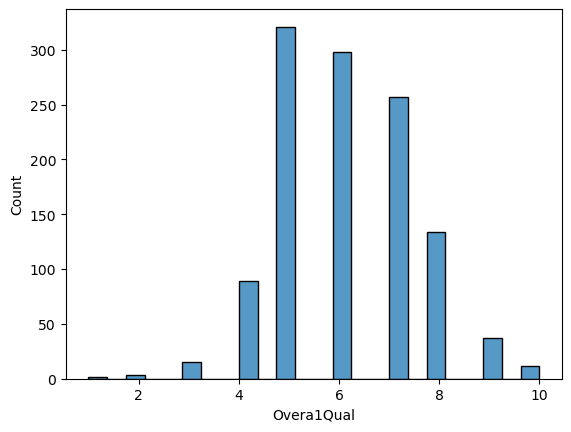

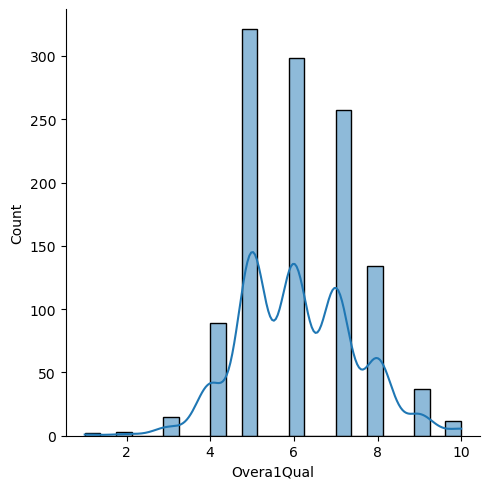

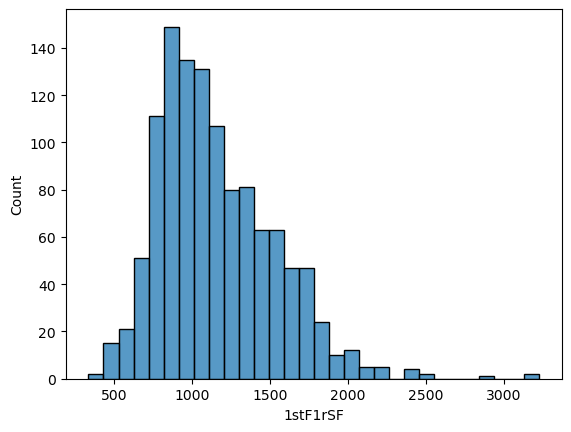

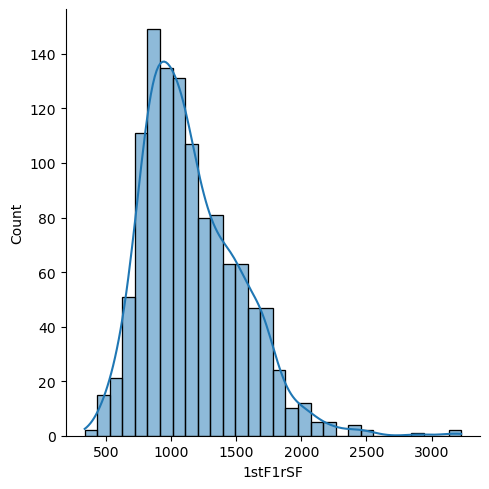

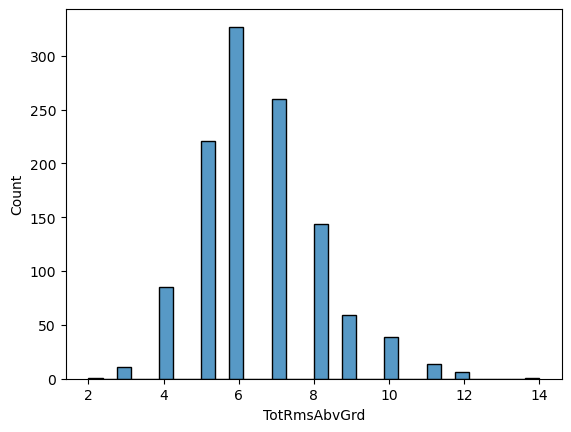

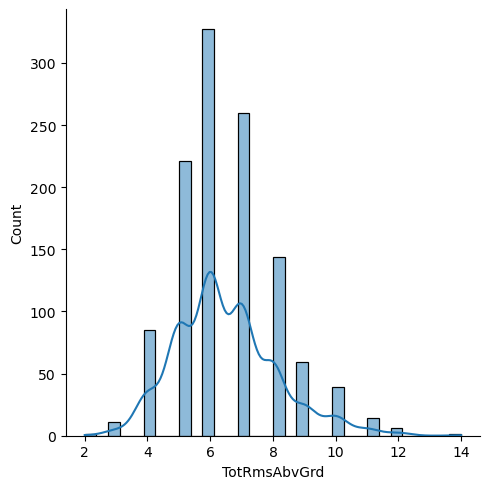

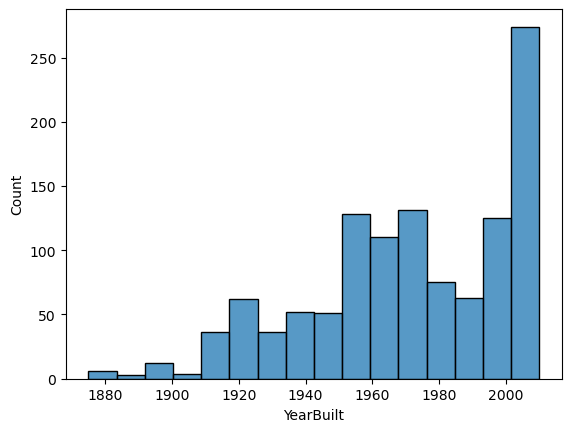

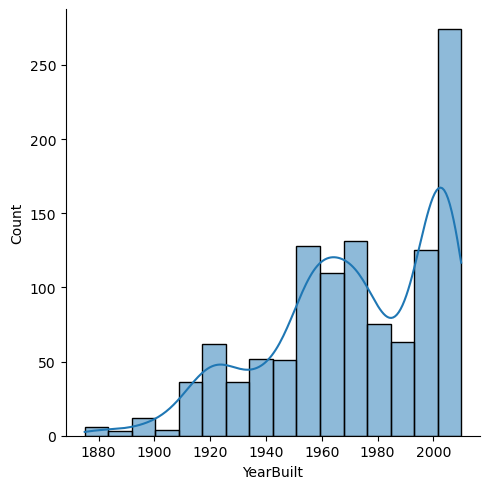

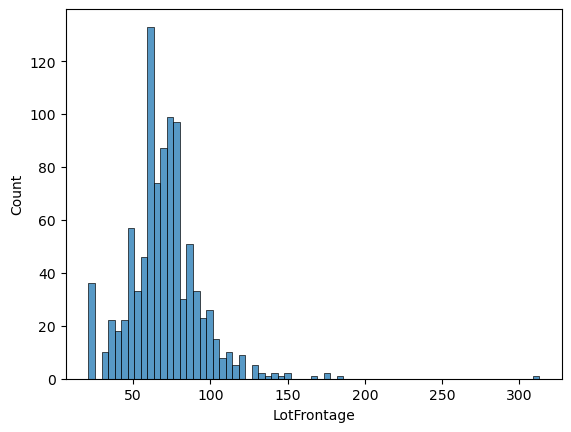

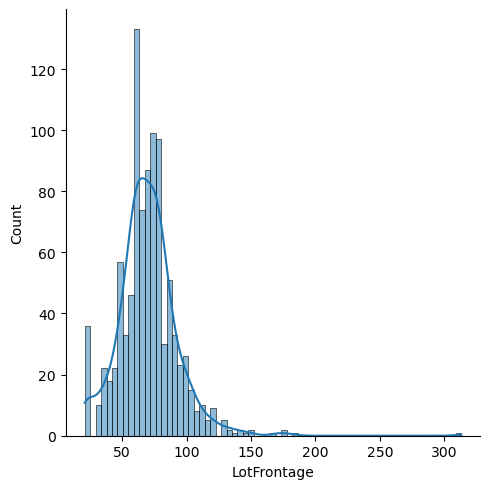

In [8]:
for subtup in dfEntr:
    sns.histplot(dfEntr[subtup])
    sns.displot(dfEntr[subtup], kde=True)
    plt.show()

### Comparacion de la variable dependiente y la varianle independiente

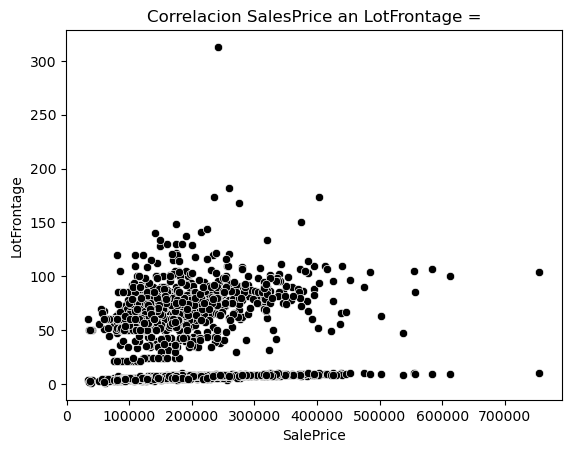

In [9]:
graph = sns.scatterplot(x=dfEntr['SalePrice'], y=dfEntr['LotFrontage'], color='black', data=dfEntr)
graph2 = sns.scatterplot(x=dfEntr['SalePrice'], y=dfEntr['Overa1Qual'], color='black', data=dfEntr)
graph.set_title('Correlacion SalesPrice an LotFrontage =')
plt.show()

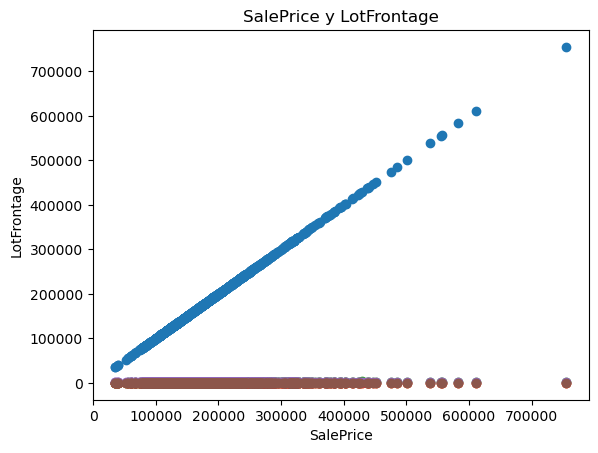

In [10]:

for subtup in dfEntr:
    plt.scatter(dfEntr['SalePrice'], dfEntr[subtup])
    plt.title(f'SalePrice y {subtup}' )
    plt.xlabel('SalePrice' )
    plt.ylabel(subtup)

### Comparacion de todas las variables en posicion X y Y

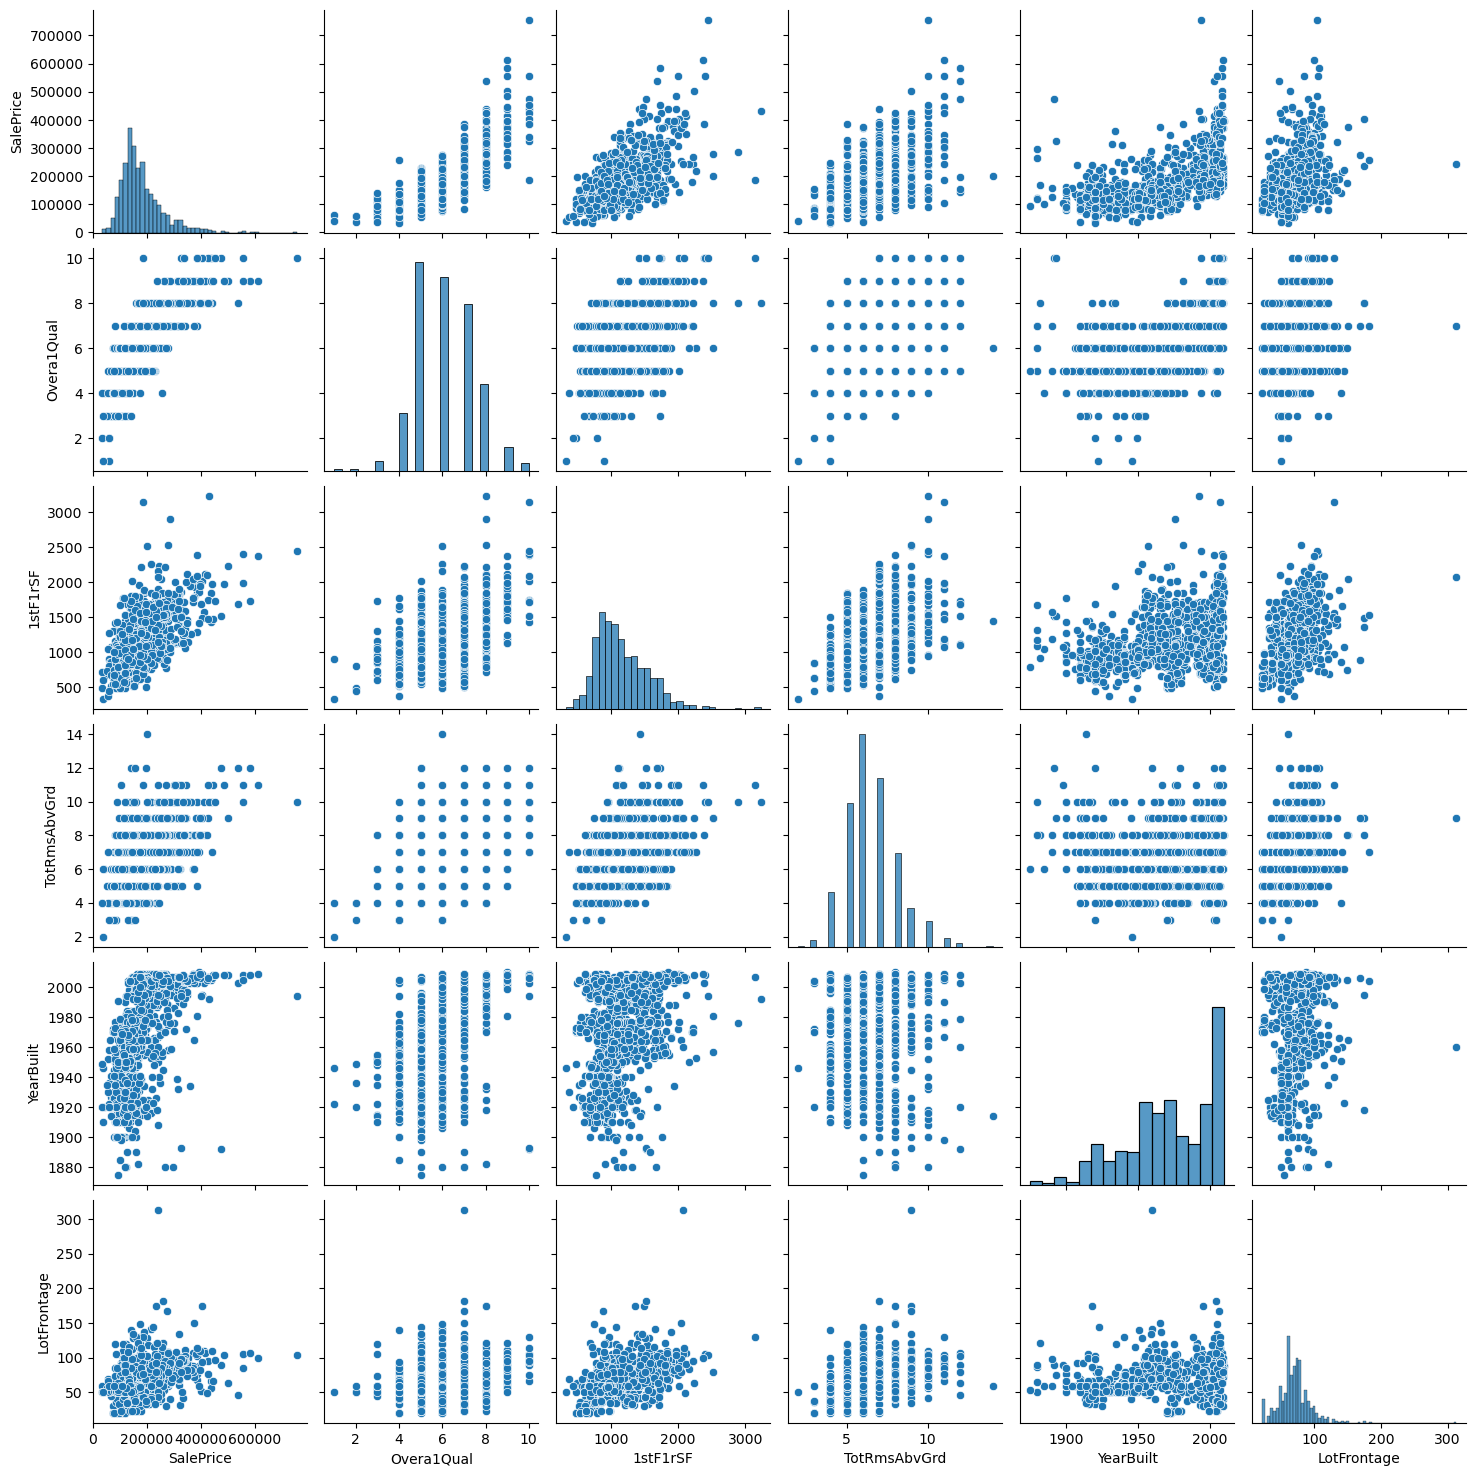

In [11]:
sns.pairplot(dfEntr)

### Definicion de funcion de regresion lineal

In [12]:
def RegresionLineal(VecX, VecY, epochs, learning_rate):
    b0 = 0.0
    b1 = 0.0
    errores = []
    resultado = []
    # RegresionLineal(dfEntr['Overa1Qual'], dfEntr['SalePrice'], epochs, learning_rate)
    x = np.array(VecX)  # Vector de datos x
    ones = np.ones(x.shape[0])     # Vector de unos con la misma longitud que x
    VecXn = np.column_stack((x, ones))
    gradiente = []
    betas = np.array([b0, b1])
    for iter in range(epochs):
        yEstimada = np.dot(VecXn, betas)
        errores.append(np.mean(np.power(VecY - yEstimada, 2)))
        delta_betas = np.dot(yEstimada - VecY, VecXn) / len(x)
        betas = (betas - (learning_rate * delta_betas))
        gradiente.append(np.array([betas]).reshape(-1, 1))

    return errores, gradiente
    

epochs = 101
learning_rate = 0.001
observacion = dfEntr['Overa1Qual']
errores, res = RegresionLineal(observacion, dfEntr['SalePrice'], epochs, learning_rate)

x=0
for b in res:
    if(x%20 == 0):
        print(f"iter {x} , B0= {b[0][0]}, B1= {b[1][0]} error: {errores[x]}" )
    x+=1   



iter 0 , B0= 1187.94767380137, B1= 180.59027739726028 error: 38819444106.4435
iter 20 , B0= 17090.812044253194, B1= 2565.7455900953773 error: 9806385589.379978
iter 40 , B0= 24117.638004259763, B1= 3565.033429693217 error: 4154563613.2395296
iter 60 , B0= 27227.148237738187, B1= 3952.739736333966 error: 3052968189.1187625
iter 80 , B0= 28607.801425366335, B1= 4070.584072128376 error: 2837652410.0912952
iter 100 , B0= 29225.441338406832, B1= 4069.379247214332 error: 2794964697.349846


c:\Users\MYN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


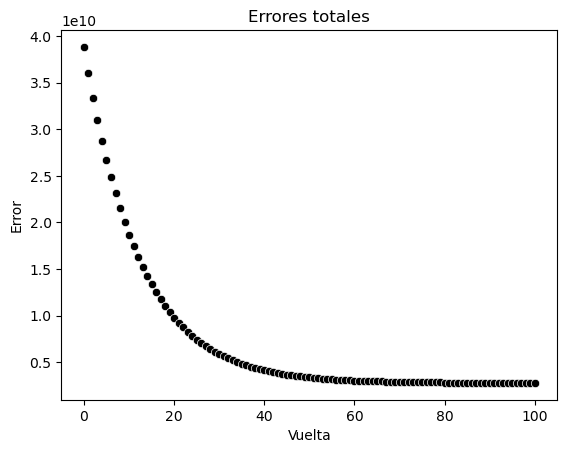

In [13]:
def GraficaError(errores):
    vueltas=np.arange(len(errores))
    sns.scatterplot(vueltas, errores,color='black',)
    plt.title("Errores totales")
    plt.xlabel("Vuelta")
    plt.ylabel("Error")
    plt.show()
GraficaError(errores)

### comparacion de proceso manual y Scikit-Learn

In [16]:


modelo = LinearRegression()
x = np.array(dfEntr["Overa1Qual"]).reshape(-1,1)
y = np.array(dfEntr["SalePrice"]).reshape(-1,1)
regresion = modelo.fit(x,y)
beta0 = regresion.intercept_
beta1 = regresion.coef_[0]

# print("Beta 0 (Intercepción): ", beta0)
# print("Beta 1 (Pendiente): ", beta1)

epochs = 50000
learning_rate = 0.001
observacion = dfEntr['Overa1Qual']
errores, res = RegresionLineal(observacion, dfEntr['SalePrice'], epochs, learning_rate)
print(f"PROCESO Scikit-Learn B0= {beta0}, B1= {beta1}" )
print(f"PROCESO MANUAL  B0= {res[len(res)-1][1]}, B1= {res[len(res)-1][0]}" )


PROCESO Scikit-Learn B0= [-96469.57131874], B1= [45411.99877916]
PROCESO MANUAL  B0= [-86994.70380306], B1= [43932.53360198]
